## 2019 January 18th

Problem: Given the root to a binary tree, implement serialize(root), which serializes the tree into a string, and deserialize(s), which deserializes the string back into the tree.

For example, given the following Node class

`class Node:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right`
        
The following test should pass:

`node = Node('root', Node('left', Node('left.left')), Node('right'))
assert deserialize(serialize(node)).left.left.val == 'left.left'`

In [1]:
class Node:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
        
node = Node('root', Node('left', Node('left.left')), Node('right'))

The tree above will be illustrated by the image below

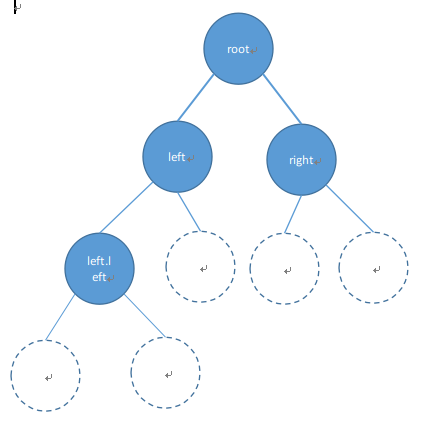

The blue circles are nodes because they were specifically created

The dotted circles are not node although they may contain values (as strings or numbers, depends)

Just for fun, I will add another value to the `node.left.right` without creating a node

In [2]:
node.left.right = 'right.right'

In [3]:
def serialize(root):
    
    string = []                              # Create an empty list to store the result
    
    def tree_to_string(node):                # This is the real thing
        if node is not None:                 # Check whether the node/value is available
            try:                             # This is in case the node is not available but the value is there
                string.append(str(node.val)) # Add the value at the node to the created list
                tree_to_string(node.left)    # Then call the function on the left and right node
                tree_to_string(node.right)   # The function will then check and add if available
            except AttributeError:           # In case the node is not available but the value is
                string.append(node + '#')    # Add the value with a indicator so the deserialize will know not to create a node
        else:                                # If neither the node nor value is available
            string.append('@')               # Add an indicator into the list
    
    tree_to_string(root)                     # Then call the function on the whole tree, the root
    
    return ' '.join(string)                  # Join all the strings in the list into one whole string

In [4]:
def deserialize(string):

    def string_to_tree(values):
        value = next(values)                    # This is like a for loop with iter below to go through each string in the list
        if value == '@':                        # Check either the node or the value is available
            return None                         # If not, well nothing
        if '#' in value:                        # Otherwise, check if the thing available is a node or value by checking the indicator
            node = value[0:(len(value) - 1)]    # If it is a value, cut the indicator and put the value in
        else:                                   # If not
            node = Node(value)                  # Create a node and put the value in
            node.left = string_to_tree(values)  # Then loop through the left and right to see if we need to create more node or not
            node.right = string_to_tree(values) #
        return node                             # Return the created node. The node here is actually the whole tree after every strings were loop through
    values = iter(string.split())               # Split the string and loop through each of them
    return string_to_tree(values)               # Apply the written function

In [5]:
# node.left.left.val

In [6]:
print('The original tree in string form is {}'.format(serialize(node)))
print('The two functions work fine: {}'.format(deserialize(serialize(node)).left.left.val == 'left.left'))
print('View the text to see the functions')

The original tree in string form is root left left.left @ @ right.right# right @ @
The two functions work fine: True
View the text to see the functions
